__Imports__

In [45]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from copy import deepcopy
from random import sample
import time

from typing import NewType, List, Dict

__Types__

In [4]:
Graph = NewType('Graph', nx.Graph)
Binary = NewType('Binary', str)   # This type will represent binary codes from integers

__Parameters__ (Wang2017)

In [240]:
N = 50             # Graph Size
pa = 2               # Preferential Attachment Parameter

mu = 160
m  = 5               # Size of binary codes

kappa = 10          # Parameter for information distortion tendency
alpha = 0.5          # Proportion of individuals with tendency to increase polarity
omega = 0.5          # Proportion of individuals with tendency to lower polarity
lambd = 5          # Polarization coefficient
gamma = 5.0          # Confidence factor

seed = int(100*(time.time()%1))            # Seed for random algorithms initialization.

A = {generate_code(x, m):0 for x in range(2**m)}             # Alphabet (work on that later) 

# Computable Information
# def max_entropy():
#     C1 = 0
#     C2 = 0
#     while C1 == C2:
#         C1 = get_binary_codes(m)
#         C2 = get_binary_codes(m)
        
#     L = C1*int(mu/2) + C2*int(mu/2)
#     P = probability_distribution(L)
    
#     return empirical_entropy(L, P)

def polarity_weights():
    v = abs(np.random.randn(m))
    return list(v/sum(v))

max_H = m

beta = polarity_weights()

***

In [241]:
T = 15000

statistics = {'H': [],
              'pi': []}

model = Model(N, pa, mu, m, kappa, lambd, alpha, omega, gamma, seed)
update_statistics(model, statistics)

In [242]:
start = time.time()

for i in range(T):
    simulate(model)
    update_statistics(model, statistics)
    
end   = time.time()
print((end - start)/60)

<ipython-input-25-5966ef021b47>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return 2/( 1/proximity(u_ind, v_ind) + 1/sigma_ratio )


23.103768495718636


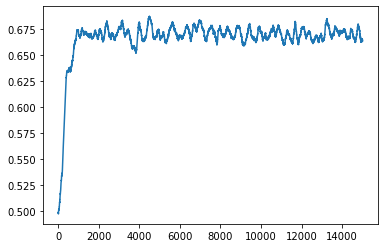

In [243]:
plt.plot(range(T + 1), statistics['pi'])

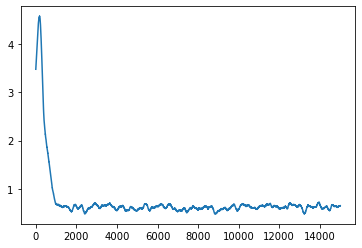

In [244]:
plt.plot(range(T + 1), statistics['H'])

In [245]:
model.G.nodes[0]['Object'].P

{'00000': 0.15,
 '00001': 0,
 '00010': 0,
 '00011': 0,
 '00100': 0,
 '00101': 0,
 '00110': 0,
 '00111': 0,
 '01000': 0,
 '01001': 0,
 '01010': 0,
 '01011': 0,
 '01100': 0,
 '01101': 0,
 '01110': 0,
 '01111': 0,
 '10000': 0,
 '10001': 0,
 '10010': 0,
 '10011': 0,
 '10100': 0,
 '10101': 0,
 '10110': 0,
 '10111': 0,
 '11000': 0,
 '11001': 0,
 '11010': 0,
 '11011': 0,
 '11100': 0,
 '11101': 0,
 '11110': 0,
 '11111': 0.85}

#### __Lista de Afazeres:__

_Os indivíduos serão modelados como vértices em um grafo não-orientado livre de escala de Barabási-Albert de tamanho $N$, com pesos. Cada vértice $u$ é caracterizado por uma tripla $(X_{u}, L_{u}, P_{u})$, em que $L_{u}$ é uma memória de tamanho $\mu$ de códigos binários de tamanho $m$, sendo possível, assim, representar $2^{m}$ diferentes tipos de informações - denotaremos o conjunto de informações possíveis - alfabeto - como $\mathcal{A}$._

- \[X\] Criar grafo de barabasi e inicializar os nodos (memórias e probabilidades).

_Calculando as frequências empíricas das informações na memória $L_{u}$ pode-se definir uma distribuição de probabilidades $P_{u}$ sobre o alfabeto, associada à variável aleatória $X_{u}$ que modela a seleção de uma informação $x \in \mathcal{A}$ por $u$ para disseminação, i.e._

$$    
\begin{equation}
  P_{u}(x) = P_{u}(X_{u} = x) = f_{x}
\end{equation}
$$

- \[X\] Programar o cálculo da entropia dos nodos.

_A frequência $f_{x}$ pode ser vista não somente como uma probabilidade de seleção da informação $x$ mas também como uma medida de saliência. De posse de uma medida de saliência das informações na memória dos indivíduos, torna-se possível analisar efeitos de conformidade e realizar comparações qualitativas entre indivíduos, formação de comunidades em função da informação mais saliente, etc. Além disso, para cada indivíduo $u$ calculamos empiricamente a entropia de Shannon,_

$$
\begin{equation}
  H(P_{u}) = - \displaystyle\sum_{x \in L_{u}} f_{x}\log{f_{x}}
\end{equation}
$$

_em que consideramos o logaritmo na base 2 - por conveniência, por vezes utilizaremos a notação $H(P_{u}) = H_{u}$. A entropia cresce conforme a distribuição de diferentes tipos de informação se torna mais uniforme (i.e. $f_{x} \rightarrow \frac{1}{|L_{u}|}$) na memória do indivíduo, e diminui conforme um tipo de informação passa a prevalecer $(f_{x} \rightarrow 1)$._

- \[X\] Programar entropia global.

_Segue, naturalmente, uma medida geral de entropia no grafo, a entropia média da população (a qual pode ser definida para um subgrafo $Q \subset G$), $\overline{H} $,_

$$
\begin{equation}
  \overline{H} = \dfrac{1}{v(G)} \displaystyle\sum_{u \in V(G)} H_{u}
\end{equation}
$$

- \[X\] Programar o cálculo do fator de distorção

_A entropia oferece uma medida de ruído com a qual o indivíduo precisa lidar ao interagir com diferentes tipos de informação, e nesse sentido é possível incluir uma tendência de distorção da informação por transmissão imperfeita. Quanto maior a entropia, mais imperfeita é a memória do indivíduo, incorrendo em maior frequência de erros de transmissão. A probabilidade de distorção é então definida como_

$$
\begin{equation}
  \delta_{u} = \dfrac{1}{ \exp{\left[(\dfrac{H_{\text{max}} - H_{u}}{H_{\text{max}}}) \cdot \kappa \right]} + 1}
\end{equation}
$$

_onde $\kappa \geq 0$ é um fator de conservação, sendo um parâmetro de controle da tendência geral de distorção de informação, sendo essa maior para valores grandes de $\kappa$, e vice-versa. O valor $ H_{\text{max}} $ é a entropia máxima, para $ f_{x} = 1 / 2^{m} $. Conforme $ H_{u} \rightarrow H_{\text{max}} $, a probabilidade de distorção atinge um valor máximo de $ 1 / 2 $, enquanto que conforme $ H_{u} \rightarrow 0 $, a probabilidade tende ao valor mínimo $ 1 / (\exp{\kappa} + 1)) $._

- \[X\] Programar a função de distorção de informação.

_Neste modelo, entendemos que a transmissão de informações entre vértices define um canal de transmissão com ruído, ou seja, cada código selecionado é transmitido bit por bit, incorrendo uma probabilidade de distorção na transmissão de cada bit. A distorção do canal pode ser construída a fim de levar em consideração diferentes fatores de interação entre indivíduos que modificaria a informação transmitida. Neste caso, em que os efeitos de memória imperfeita são simulados, a probabilidade $D_{u}$ introduz a chance de uma mutação aleatória em cada bit transmitido por $u$._

- \[X\] Programar o cálculo da polarização de informações
    - \[X\] Programar o cálculo da polarização do indivíduo
    
_Introduziremos ao modelo um elemento de viés, ou polarização, onde um indivíduo pode ter uma tendência de distorção da informação para um extremo de polaridade. Primeiramente, definimos uma função $\pi: \mathcal{A} \to [0, 1]$ que nos permite diferenciar as informações quanto a sua polaridade. Para uma informação $x = B_1B_2\dots B_{m},\; B_{i} \in \{0, 1\}\; \forall i = 1, \dots, m$, a polaridade de $\pi(x)$ é dada por_

$$
\begin{equation}
  \pi(x) = \displaystyle\sum_{i = 1}^{m} \beta_{i} B_{i} 
\end{equation} 
$$

_onde $\beta_{1} < \beta_{2} < \dots < \beta_{m}$ é um conjunto de pesos com soma unitária definindo a prioridade de algarismos nos códigos binários. Os pesos podem ser especificados pela seleção de um vetor aleatório normalizado, ou especificados manualmente em um contexto onde os dígitos tem um significado particular. Dessa forma, $\pi(\cdot)$ é monotonicamente crescente e contida no intervalo $[0, 1]$. A função leva em consideração a posição dos bits não-nulos, de modo que, supondo $m = 4$, os códigos $1000$ e $0001$ seriam identificados como distintos e posicionados em polos opostos._

_Naturalmente, podemos caracterizar a polaridade de um indivíduo $u$ calculando o valor médio $\overline{\pi}(u)$ das informações na memória $L_{u}$:

$$
\begin{equation}
  \overline{\pi}(u) = \dfrac{1}{\mu} \displaystyle\sum_{x \in L_{u}} \pi(x) 
\end{equation}
$$

- \[X\] Programar a separação dos nodos em três grupos

_Em seguida, tomando dois parâmetros $\alpha, \omega \in [0, 1]$ tais que $\alpha + \omega \leq  1$, e $\alpha \cdot |V|, \omega \cdot |V|$ são inteiros, onde $|V|$ é o número de vértices da rede, particionamos o conjunto de vértices em três grupos, $V_{\downarrow}, V_{\uparrow}, \overline{V}$, onde $|V_{\downarrow}| = \alpha |V|, |V_{\uparrow}| = \omega |V|$ e $|\overline{V}| = (1 - \alpha - \omega) |V|$, em que cada partição é construída tomando - sem reposição - vértices ao acaso. O conjunto $V_{\downarrow}$ comporta os indivíduos com tendência para polarizar para baixo, enquanto que o conjunto $V_{\uparrow}$ reúne os indivíduos que polarizam para cima e $\overline{V}$ os indivíduos que se mantém neutros._

- \[X\] Programar a probabilidade de polarização

_Para um indivíduo $u$, onde $N(u)$ é o conjunto de vizinhos de $u$, a expressão_

$$
\begin{equation}
  \xi_{u}\, = | \overline{\pi}(u) - \dfrac{1}{|N(u)|} \displaystyle\sum_{v \in N(u)} \overline{\pi}(v) | \cdot \lambda
\end{equation}
$$

_pode ser utilizada para definir a probabilidade de distorção de cada bit de um código selecionado para transmissão de acordo com o viés do indivíduo, onde $\lambda \in [0, 0.5]$ é o coeficiente de polarização. Pode-se entender $\xi_{u}$ de modo análogo a $\delta_{u}$. Perceba que_

$$
\begin{equation}
  | \overline{\pi}(u) - \dfrac{1}{|N(u)|} \displaystyle\sum_{v \in N(u)} \overline{\pi}(v) | \leq 1,
\end{equation}
$$

_de modo que $\xi_{u}$ tende ao valor máximo $\lambda$ conforme a polaridade $\overline{\pi}(u)$ se distancia da polaridade média da vizinhança de $u$._

- \[X\] Programar a distorção da informação com base em probabilidades de distorção.

_Dessa forma, a transmissão de informações entre dois indivíduos configura um canal binário simétrico, onde para um indivíduo $u$ as probabilidades de distorção são dadas por_

$$
\begin{equation}
  \begin{split}
    P(y = 0 | x = 0) &= 1 - \delta_{u}; \\
    P(y = 1 | x = 0) &= \delta_{u}; \\
    P(y = 0 | x = 1) &= \delta_{u}; \\
    P(y = 1 | x = 1) &= 1 - \delta_{u}
  \end{split}
\end{equation}
$$

_se $u \in \overline{V}$,_

$$
\begin{equation}
  \begin{split}
    P(y = 0 | x = 0) &= 1 - \delta_{u} - \xi_{u}; \\
    P(y = 1 | x = 0) &= \delta_{u} + \xi_{u}; \\
    P(y = 0 | x = 1) &= \delta_{u}; \\
    P(y = 1 | x = 1) &= 1 - \delta_{u}
  \end{split}
\end{equation}
$$

_se $u \in V_{\downarrow}$ e, por fim, se $u \in V_{\uparrow}$, temos_

$$
\begin{equation}
  \begin{split}
    P(y = 0 | x = 0) &= 1 - \delta_{u} ; \\
    P(y = 1 | x = 0) &= \delta_{u}; \\
    P(y = 0 | x = 1) &= \delta_{u} + \xi_{u}; \\
    P(y = 1 | x = 1) &= 1 - \delta_{u} - \xi_{u}
  \end{split}
\end{equation}
$$

_As probabilidades anteriores são válidas, considerando que $0 \leq \xi_{u}, \; \delta_{u} \leq 0.5$, então $0 \leq \delta_{u} + \xi_{u} \leq 1$._

- \[X\] Programar a função de informação relativa

$$
\begin{equation}
        D(P;Q) = \displaystyle\sum_{x}P(x) \log{\dfrac{P(x)}{Q(x)}}  = E_{P}[\log{\dfrac{P(X)}{Q(X)}}]
\end{equation}
$$

- \[X\] Programar a função da Medida de Divergência de Jensen-Shannon

_A atribuição dos pesos nas arestas buscará modelar a proximidade de pensamento entre dois indivíduos, servindo de base para a parametrização da aceitação de informações entre sujeitos. Partindo do modo como a memória de um indivíduo foi modelada, torna-se inviável a princípio definir uma distribuição de probabilidade conjunta ou condicional entre a informação observada entre dois indivíduos, ao passo que as distribuições de probabilidade obtidas pela frequência empírica sobre as memórias $L_{u}$ e $L_{v}$ são independentes. Dessa forma, medidas tais quais Informação Mútua não podem ser utilizadas. Assim, aplicamos a medida de divergência de Jensen-Shannon (JSD) - raio de informação - sobre as distribuições $P_{u}$ e $P_{v}$ de dois vizinhos $u$ e $v$ para o cálculo da sua similaridade:_

$$
\begin{align*}
  JSD(P_{u};P_{v}) &=  \dfrac{1}{2}D(P_{u}; M) + \dfrac{1}{2} D(P_{v};M) \\ 
                      &= H(M) - \dfrac{H(P_{u}) + H(P_{v})}{2} \\ 
\end{align*}
$$

_onde $M = \dfrac{1}{2}(P_{u} + P_{v})$. Vale que $JSD(P_{u}, P_{v}) \to 0$ com $P_{u} \to P_{v}$, portanto, às arestas $(u, v)$ definimos os pesos $1 - JSD(P_{u}, P_{v})$ _ 

- \[X\] Programar o cálculo do peso das arestas.

- \[X\] Calcular a distribuição sigma(u) dos vértives.

_A aceitação das informações de um indivíduo $v$, por parte de um indivíduo $u$ depende de uma probabilidade que deve considerar a proximidade de $u$ e $v$ e a percepção de $u$ sobre $v$. Essa percepção pode levar em consideração a influência, medido pelo número de conexão dos vértices, ponderado pela proximidade medida por $JSD(\cdot;\cdot)$ entre um vértice e seus vizinhos. Considere primeiramente a distribuição sobre os vértices $u \in Q$, onde $Q \subset V(G)$,

$$
\begin{equation}
  \sigma(u) = \displaystyle\sum_{w \in N(u)} (1 - JSD(P_{u}, P_{w})) \leq k_{u}, 
\end{equation}
$$

_onde $k_{u}$ é o grau do vértice $u$. A ponderação da proximidade entre $u$ e seus vizinhos pode ser interpretada como um peso do suporte da comunidade adjacente à $u$, tendo em vista que um vértice $u$ com muitas conexões ideologicamente distantes não poderia ser entendido como popular._

- \[X\] Programar a probabilidade de aceitação

_A probabilidade de aceitação $\eta_{v \to u}$ de uma informação de $v$ por $u$ é definida como_

$$
\begin{equation}
  \eta_{v \to u} = \dfrac{2}{(1 - JSD(P_{u}, P_{v}))^{ - 1} + \left(\dfrac{\sigma(v)^{\gamma }}{\max_{w \in N(u) \cup \{u\}}{\sigma(w)^{\gamma }}}\right)^{ - 1}} 
\end{equation}
$$

_em que $\gamma$ é um parâmetro denominado fator de confiança. Se $\gamma > 0$, um indivíduo $v$ terá maior tendência de aceitar a informação de vizinhos mais influentes, e vice-versa. Para $\gamma = 0$, $v$ tenderá a confiar em todos os vizinhos igualmente. A aplicação da média harmônica faz com que a probabilidade seja sensível a variações, isto é, a separação elevada entre $u$ e $v$ ou a impopularidade (ou popularidade, a depender de $\gamma$) do emissor tem um peso negativo considerável._ 

In [24]:
def harmonic_mean(values: List[float]) -> float:
    return len(values)/sum(map(lambda x: 1/x, values))

In [25]:
def acceptance_probability(G: Graph, u: int, v:int, gamma: float) -> float:
    u_ind = G.nodes[u]['Object']
    v_ind = G.nodes[v]['Object']
    max_sigma = max(set([u_ind.sigma**gamma]).union([G.nodes[w]['Object'].sigma**gamma for w in G.neighbors(u)]))
    sigma_ratio = v_ind.sigma**gamma/max_sigma
    return 2/( 1/proximity(u_ind, v_ind) + 1/sigma_ratio )

In [26]:
def D(P: Dict[Binary, float], Q: Dict[Binary, float]) -> float:
    relative_information = lambda x: P[x]*np.log2(P[x]/Q[x]) if Q[x] != 0 else (0 if P[x] == 0 else np.inf)
    sum(map(relative_information, P.keys()))

In [40]:
def JSD(Pu: Dict[Binary, float], Pv: Dict[Binary, float]) -> float:
    return empirical_entropy(list(Pu.keys()), {code:(Pu[code] + Pv[code])/2 for code in Pu}) - \
            (empirical_entropy(Pu.keys(), Pu) + empirical_entropy(Pv.keys(), Pv))/2

def proximity(u: Individual, v:Individual) -> float:
    return 1 - JSD(u.P, v.P)

In [28]:
def mean(L: List) -> float:
    return sum(L)/len(L)

In [29]:
def select_from_list(L: List, Idx: List) -> List:
    return [L[i] for i in Idx]

In [30]:
def polarity(x: Binary, beta: List[float]) -> float:
    bits = list(map(lambda x: int(x), list(x)))
    return sum(map(lambda x: x[0]*x[1], zip(beta, bits)))

In [41]:
def to_string(character_list: List[str]) -> str:
    string = ''
    for char in character_list:
        string += char
    return string

def get_transition_probability(ind: Individual, tendency: str) -> Dict[str, float]:
    '''
    Returns a dictionary with probabilities of bit distortion, i.e. the probability of 0 -> 1 and 1 -> 0.
    '''
    return {'0': ind.delta + ind.xi, '1':ind.delta} if tendency == 'Up' else \
          ({'0': ind.delta, '1':ind.delta + ind.xi} if tendency == 'Down' else \
           {'0': ind.delta, '1':ind.delta})

def mutate(bit: str, probability: float) -> str:
    x = np.random.uniform()
    if x <= probability:
        return '1' if bit == '0' else '0'
    return bit

def distort(code: Binary, transition_probability: Dict[str, float]) -> Binary:
    character_list = list(code)
    
    for i in range(len(character_list)):
        character_list[i] = mutate(character_list[i], transition_probability[character_list[i]])
    
    return to_string(character_list)

In [32]:
class Individual:
    def __init__(self, mu: int, m: int, kappa: float):
        self.kappa = kappa
        self.L = initialize_memory(mu, m)
        self.L_temp = []
        self.P = probability_distribution(self.L)
        
    @property
    def kappa(self):
        return self._kappa
    
    @property
    def L(self):
        return self._L
    
    @property
    def mu(self):
        return len(self.L)
    
    @property
    def P(self):
        return self._P
    
    @property
    def X(self):
        return self.select_information()
    
    @property
    def H(self):
        return self._H
    
    @property
    def delta(self):
        return self._delta
    
    @property
    def pi(self):
        return self._pi
    
    @kappa.setter
    def kappa(self, kappa: float):
        self._kappa = kappa
        
    @L.setter
    def L(self, memory: List[Binary]):
        '''
        Everytime the memory is updated, the distribution must be updated, so as the entropy (and the values that depends on the entropy) 
        and the polarization.
        '''
        self._L = memory
        self.P  = probability_distribution(self.L)
        self.compute_entropy()
        self.compute_polarization()
        
    @P.setter
    def P(self, distribution: Dict[Binary, float]):
        self._P = distribution
    
    def compute_entropy(self):
        '''
        Everytime the entropy is updated, the conservation factor must be updated also.
        '''
        self._H = empirical_entropy(self.L, self.P)
        self.compute_conservation_factor()
        
    def compute_conservation_factor(self):
        self._delta = 1/(np.exp(self.kappa*(max_H - self.H)/max_H) + 1)
        
    def compute_polarization(self, beta: float = beta):
        self._pi = sum([polarity(code, beta) for code in self.L])/len(self.L)
        
    def select_information(self):
        return random_selection(self.P)
    
    def update_memory(self):
        '''
        Update the main memory with all new codes from L_temp.
        At the end of this code it's guaranteed that every new code was added to the main memory, replacing 
        '''
        memory_copy = deepcopy(self.L)         # work on a copy to avoid side effects
        for new_code in self.L_temp:
            memory_copy.pop()                  # remove the last code (first in)
            memory_copy.insert(0, new_code)    # add a new code to the beginning of the queue
        
        self.L = memory_copy
        self.L_temp = []
        
    def receive_information(self, new_code: Binary):
        if new_code != None:
            self.L_temp = self.L_temp + [new_code]

In [77]:
indiv = Individual(mu, m, kappa)

In [34]:
class Model:
    def __init__(self, N: int, pa: int,            # Graph Parameters
                       mu: int, m: int,            # Memory Parameters
                       kappa: float, lambd: float, # Proccess Parameters
                       alpha: float, omega: float, # Population Parameters
                       gamma: float,               # Information Dissemination Parameters
                       seed: int = 42):
        self.N  = N
        self.pa = pa
        
        self.mu = mu
        self.m  = m
        self.kappa = kappa
        self.alpha = alpha
        self.omega = omega
        self.lambd = lambd
        self.gamma = gamma
        
        self._seed = seed
        
        self.build_model()
        
    @property
    def N(self):
        return self._N
    @N.setter
    def N(self, N:int):
        self._N = N
    @property
    def pa(self):
        return self._pa
    @pa.setter
    def pa(self, pa:int):
        self._pa = pa
    @property
    def mu(self):
        return self._mu
    @mu.setter
    def mu(self, mu:int):
        self._mu = mu
    @property
    def m(self):
        return self._m
    @m.setter
    def m(self, m:int):
        self._m = m
    @property
    def kappa(self):
        return self._kappa
    @kappa.setter
    def kappa(self, kappa:float):
        self._kappa = kappa
    @property
    def alpha(self):
        return self._alpha
    @alpha.setter
    def alpha(self, alpha:float):
        self._alpha = alpha
    @property
    def omega(self):
        return self._omega
    @omega.setter
    def omega(self, omega:float):
        self._omega = omega
    @property
    def lambd(self):
        return self._lambd
    @lambd.setter
    def lambd(self, lambd:float):
        self._lambd = lambd
    @property
    def H(self):
        return self._H
    @property
    def G(self):
        return self._G
    @G.setter
    def G(self, G: Graph):
        self._G = G
        
    @property
    def seed(self):
        return self._seed
        
    def build_model(self):
        self.G = nx.barabasi_albert_graph(self.N, self.pa, self.seed)
        self.initialize_nodes()
        self.compute_entropy()
        self.compute_polarity()
        self.group_individuals()
        self.compute_polarity_chance()
        self.define_distortion_probabilities()
        self.compute_edge_weights()
        self.compute_sigma_attribute()
        
    def update_model(self):
        for node in self.G:
            self.G.nodes[node]['Object'].update_memory()
            
        self.compute_entropy()
        self.compute_polarity()
        self.compute_polarity_chance()
        self.define_distortion_probabilities()
        
    def initialize_nodes(self):
        '''
        Attribute to each node a new 'Individual' object.
        '''
        nx.set_node_attributes(self.G, {node:Individual(self.mu, self.m, self.kappa) for node in self.G}, name = 'Object')
            
    def group_individuals(self):
        indices = sample(list(range(self.N)), k = self.N)
        group_a = indices[:int(self.alpha*self.N)]
        group_b = indices[int(self.alpha*self.N): int(self.alpha*self.N) + int(self.omega*self.N)]
        group_c = indices[int(self.alpha*self.N) + int(self.omega*self.N):]
        
        attribute_dict = {}
        attribute_dict.update({list(self.G.nodes())[i]:'Up' for i in group_a})
        attribute_dict.update({list(self.G.nodes())[i]:'Down' for i in group_b})
        attribute_dict.update({list(self.G.nodes())[i]:'-' for i in group_c})
        
        nx.set_node_attributes(self.G, attribute_dict, name = 'Tendency')
        
    def compute_polarity_chance(self):
        for node in self.G:
            node_object = self.G.nodes[node]['Object']
            mean_polarity_neighbours = mean([self.G.nodes[neighbor]['Object'].pi for neighbor in self.G.neighbors(node)])
            setattr(node_object, 'xi', self.lambd*abs(node_object.pi - mean_polarity_neighbours))
            
    def define_distortion_probabilities(self):
        for node in self.G:
            individual = self.G.nodes[node]['Object']
            tendency   = self.G.nodes[node]['Tendency']
            setattr(individual, 'DistortionProbability', get_transition_probability(individual, tendency))
            
    def compute_edge_weights(self):
        nx.set_edge_attributes(self.G, {(u, v):(1 - JSD(self.G.nodes[u]['Object'].P, self.G.nodes[v]['Object'].P)) for u, v in self.G.edges}, 'Distance')
        
    def compute_sigma_attribute(self):
        for node in self.G:
            global_proximity = sum([self.G.edges[(node, neighbor)]['Distance'] for neighbor in self.G.neighbors(node)])
            setattr(self.G.nodes[node]['Object'], 'sigma', global_proximity)
            
    def get_acceptance_probability(self, u: int, v:int) -> float:
        return acceptance_probability(self.G, u, v, self.gamma)
        
    def compute_entropy(self):
        self._H = sum([self.G.nodes[node]['Object'].H for node in self.G])/self.N
        
    def compute_polarity(self):
        self.pi = sum([self.G.nodes[node]['Object'].pi for node in self.G])/self.N

In [42]:
model = Model(N, pa, mu, m, kappa, lambd, alpha, omega, gamma, seed)

Como verificar se o gráfico possui a propriedade correta?

In [188]:
def verify_scalefree_property(G: Graph) -> None:
    unique_degrees = {degree:(lambda x: degrees.count(x)/(N*100))(degree) for degree \
                                                          in sorted(set([degree for _, degree in list(G.degree)]))}

Inicializando as memórias.

_Se definirmos $\varphi(\cdot)$ como um operador que converte números inteiros em suas representações binárias, então o estado inicial da memória de um vértice $u$, $L_{u}(0)$, é dado por_

$$
      L_{u}(0) = \{x_{i}\; |\; i = 1, \dots, \mu;\;\; x_{i} = \varphi(X),\;\;  X \thicksim  B (2^{m}, 0.5) \}
$$

_onde $B(2^{m}, 0.5)$ é uma distribuição binomial com parâmetros $(n, p) = (2^{n}, 0.5)$, aproximando uma distribuição normal com parâmetros $(\mu, \sigma^2) = (2^{n - 1}, 2^{n - 2})$._

In [36]:
to_int = lambda x: int('0b'+x, 2)             # Add prefix
to_bin = lambda x: bin(x)[2:]                 # Remove prefix
complete_zeros = lambda x, m: '0'*(m - len(x))+x # add zeros at the beginning of the binary code if its length isn't equal to s

def generate_code(x: int, m: int) -> Binary:
    return complete_zeros(to_bin(x), m)

def get_binary_codes(m: int, mu: int = None) -> List[Binary]:
    '''
    Return a list of binary codes (without prefix) of integers drawn from a Binomial Distribution with parameters (n, 0.5)
    where n = 2**m
    Inputs:
        code_length (n) - length of the binary code (also specify the range)
        n_codes - length of the list; number of codes
    '''
    return [generate_code(a, m) for a in np.random.binomial(2**m, 0.5, size = mu)] if mu != None else \
           [generate_code(np.random.binomial(2**m, 0.5), m)]

def initialize_memory(mu: int, m: int) -> List[Binary]:
    '''
    Return a list of random binary codes parametrized by the model. This lists initializes the memory of a individual.
    '''
    return get_binary_codes(m = m, mu = mu)

def probability_distribution(codes: List[Binary]) -> Dict[Binary, float]:
    '''
    Return a probability distribution determined over a list of binary codes.
    '''
    return complete_probability_distribution({code:(lambda x: codes.count(x)/(len(codes)))(code) \
                                              for code in set(codes)})

def complete_probability_distribution(incomplete_distribution: Dict[Binary, float]) -> Dict[Binary, float]:
    new_A = deepcopy(A)
    
    for code in incomplete_distribution:
        new_A[code] = incomplete_distribution[code]
    
    return new_A

def random_selection(distribution: Dict[Binary, float]) -> Binary:
    '''
    Select randomly a binary code from a given distribution.
    '''
    x = np.random.uniform()
    cumulative_probability = 0
    for code in distribution.keys():
        cumulative_probability += distribution[code]
        if cumulative_probability >= x:
            return code
        
def empirical_entropy(memory: List[Binary], distribution: Dict[Binary, float]) -> float:
    entropy = lambda x: distribution[x]*np.log2(distribution[x]) if distribution[x] != 0 else 0
    return - sum(map(entropy, list(set(memory))))
        
# def test_selection(distribution: Dict[Binary, float], n_experiments: int = 50) -> None:
#     '''
#     Test if the selection process is following the given distribution.
#     '''
#     selection_count = {code: 0 for code in distribution.keys()}
#     for i in range(n_experiments):
#         selection_count[random_selection(distribution)] += 1
    
#     for code in selection_count.keys():
#         selection_count[code] /= n_experiments
        
#     return selection_count

In [15]:
sample = initialize_memory(mu, m)

In [16]:
distribution = probability_distribution(sample)

__To do:__

- Faça uma função para retornar uma figura pré-formatada para plotar curvas. Padronize a formatação desses gráficos.

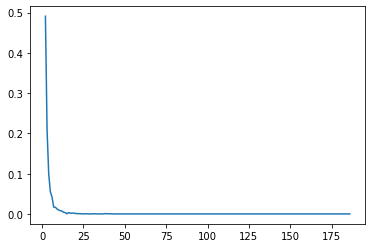

In [73]:
plt.plot(list(unique_degrees.keys()), list(unique_degrees.values()))

***

## Algoritmo

_O grafo será inicializado com a memória de todos os indivíduos totalmente preenchida aleatoriamente, a fim de que seja possível calcular os valores iniciais para os pesos das arestas. A memória funcionará como uma estrutura de fila do tipo $ FIFO $, first-in-first-out, onde a inserção de uma nova informação na fila desloca as informações mais antigas, descartando a última da fila. Se definirmos $\varphi(\cdot)$ como um operador que converte números inteiros em suas representações binárias, então o estado inicial da memória de um vértice $u$, $L_{u}(0)$, é dado por_

$$
\begin{equation}
  L_{u}(0) = \{x_{i}\; |\; i = 1, \dots, \mu;\;\; x_{i} = \varphi(X),\;\;  X \thicksim  B (2^{m}, 0.5) \}
\end{equation}
$$

_onde $B(2^{m}, 0.5)$ é uma distribuição binomial com parâmetros $(n, p) = (2^{n}, 0.5)$, aproximando uma distribuição normal com parâmetros $(\mu, \sigma^2) = (2^{n - 1}, 2^{n - 2})$. É cabível observar que os parâmetro definidos dependem da memória dos indivíduos em cada instante, que é alterada ao longo da simulação. Há, portanto, uma dependência temporal desses parâmetros. Por simplicidade omitiremos na notação a consideração de que as definições e processos descritos nesta seção dizem respeito a um dado instante $t$._

_Também é feita a especificação dos parâmetros $\alpha$ e $\omega$ a fim de dividir os vértices da rede nos grupos $V_{\downarrow}$, $V_{\uparrow}$ e $\overline{V}$, que determina o padrão de polarização de cada vértice._ 

_Em uma primeira fase da simulação, admitindo que exista uma representação do grafo por uma lista de arestas $E$, o algoritmo percorrerá todos os elementos $\langle u, v \rangle \in E$ realizando trocas de informações entre $u$ e $v$, i.e. escolhe-se ao acaso $x \in X_{u}$ e $y \in X_{v}$ partindo das distribuições $P_{u}$ e $P_{v}$, e faz-se a transmissão de $x$ para $v$ e $y$ para $u$ levando em consideração as probabilidades de distorção definidas anteriormente para os indivíduos de cada grupo, isto é, considerando que o indivíduo possa polarizar para cima, para baixo ou se manter neutro. Portanto, a informação recebida por um indivíduo não corresponde necessariamente à informação emitida. Nesse processo, também é garantido que todo vértice transmitirá alguma informação (não necessariamente a mesma) para cada um dos seus vizinhos._

_Após a seleção se verifica a aceitação da informação emitida, segundo a probabilidade $\eta_{u \to  v}$ definida acima. As informações rejeitadas são descartadas, enquanto que as informações aceitas são armazenadas em uma lista temporária até a conclusão da disseminação na rede, em que os dados da rede são atualizados._

_Ao término de um momento $t$ da simulação, cada vértice $u \in V(G)$ passa a ter uma nova memória $L_{u}(t + 1)$ com a adição das informações recebidas, e o grafo pode ser atualizado com o cálculo dos novos pesos $JSD(u, v)$ e dos parâmetros que dependem deles._

In [37]:
def update_statistics(M: Model, statistics: Dict):
    statistics['H'].append(model.H)
    statistics['pi'].append(model.pi)

In [38]:
def evaluate_information(code: Binary, acceptance_probability: float):
    return code if (np.random.uniform() <= acceptance_probability) else None

In [39]:
def simulate(M: Model):
    for u, v in M.G.edges():
        u_ind = M.G.nodes[u]['Object']
        v_ind = M.G.nodes[v]['Object']
        u_ind.receive_information(evaluate_information(distort(v_ind.X, v_ind.DistortionProbability), M.get_acceptance_probability(u, v)))
        v_ind.receive_information(evaluate_information(distort(u_ind.X, u_ind.DistortionProbability), M.get_acceptance_probability(v, u)))
    M.update_model()
    
    # here i can put some functions to extract statistics from the model

#### Modos de avaliar o modelo.

- Calcular estatísticas globais e plotar sua evolução no tempo.
- Plotar a distribuição de estatísticas locais em certos pontos da simulação.
- Dinâmica avaliando em paralelo a proporção de grupos.

#### Modos de melhorar o modelo.
- Avaliar o custo de processamento das diferentes partes da simulação; identificar pontos passíveis de otimização.